# Ogrenci kabul aldi mi almadi mi? Tahmini

In [1]:
import matplotlib.pyplot as plt

def plotData(X, y):
    # Create New Figure
    plt.figure()
    
    # Plot the positive and negative examples on a 2D plot
    positive = (y == 1)
    negative = (y == 0)
    
    plt.plot(X[positive, 0], X[positive, 1], 'k+', linewidth=2, markersize=7)
    plt.plot(X[negative, 0], X[negative, 1], 'ko', markerfacecolor='y', markersize=7)
    
    plt.show()

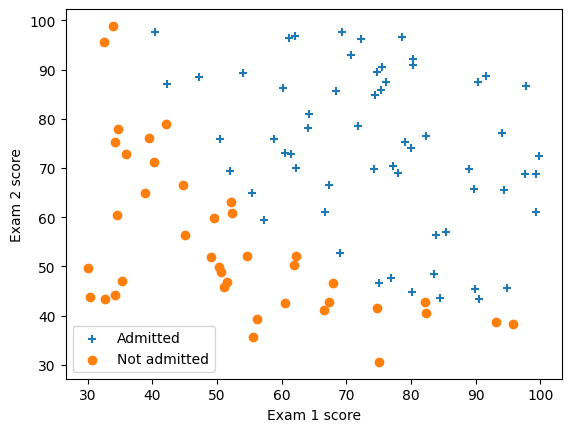

Cost at initial theta (zeros): 0.6931471805599451
Expected cost (approx): 0.693
Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628

Cost at theta found by fminunc: 0.20349770158947464
Expected cost (approx): 0.203
Optimal theta: [-25.16131863   0.20623159   0.20147149]
Expected theta (approx):
 -25.161
 0.206
 0.201



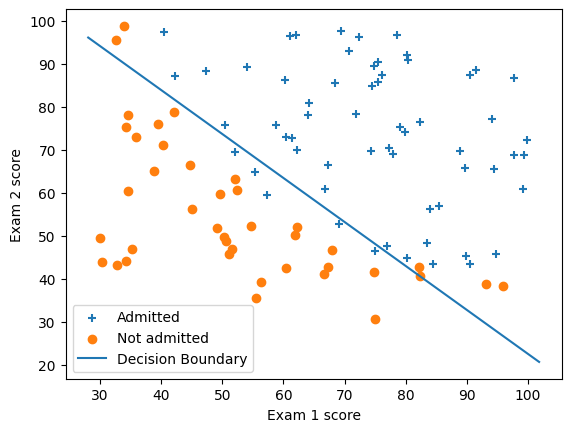

Train Accuracy: 89.0
Expected accuracy (approx): 89.0
For a student with scores 45 and 85, we predict an admission probability of 0.7762906244614266
Expected value: 0.775 +/- 0.002


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Sigmoid fonksiyonunu tanımlama
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Veri yüklemesi
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

# Veriyi görselleştirme fonksiyonu
def plotData(X, y):
    plt.figure()
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Admitted')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.show()

# Veriyi görselleştirme
plotData(X, y)

# Sigmoid fonksiyonunu uygulama
def costFunction(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = (-1 / m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    grad = (1 / m) * X.T.dot(h - y)
    return J, grad

# Veriye bias ekleyerek başlangıç theta değerini ayarlama
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1)
initial_theta = np.zeros(n + 1)

# Hesaplamaları başlatma
cost, grad = costFunction(initial_theta, X, y)
print(f"Cost at initial theta (zeros): {cost}")
print("Expected cost (approx): 0.693")
print(f"Gradient at initial theta (zeros): {grad}")
print("Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n")

# Optimizasyon için fminunc'u kullanma
result = minimize(costFunction, initial_theta, args=(X, y), jac=True, method='TNC')
optimal_theta = result.x
optimal_cost = result.fun

print(f"Cost at theta found by fminunc: {optimal_cost}")
print("Expected cost (approx): 0.203")
print(f"Optimal theta: {optimal_theta}")
print("Expected theta (approx):\n -25.161\n 0.206\n 0.201\n")

# Veriyi görselleştirme ve sınırlayıcı çizimi
def plotDecisionBoundary(theta, X, y):
    plt.figure()
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], marker='+', label='Admitted')
    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], marker='o', label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    
    plot_x = np.array([min(X[:, 1]) - 2, max(X[:, 1]) + 2])
    plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
    plt.plot(plot_x, plot_y, label='Decision Boundary')
    
    plt.legend()
    plt.show()

plotDecisionBoundary(optimal_theta, X, y)

# Tahmin yapma ve doğruluk hesaplama
def predict(theta, X):
    predictions = sigmoid(X.dot(theta))
    return (predictions >= 0.5).astype(int)

p = predict(optimal_theta, X)
accuracy = np.mean(p == y) * 100
print(f"Train Accuracy: {accuracy}")
print("Expected accuracy (approx): 89.0")

# Yeni bir öğrencinin kabul olasılığını tahmin etme
prob = sigmoid(np.dot([1, 45, 85], optimal_theta))
print(f"For a student with scores 45 and 85, we predict an admission probability of {prob}")
print("Expected value: 0.775 +/- 0.002")


# Sigmoid fonksiyonumuz

In [3]:
import numpy as np

def sigmoid(z):
    # Compute the sigmoid of each value of z
    g = 1 / (1 + np.exp(-z))
    return g

In [4]:
sigmoid(35)

0.9999999999999993

# Maliyet Fonksiyonu kodlarımız

In [5]:
import numpy as np

def costFunction(theta, X, y):
    # number of training examples
    m = len(y)
    
    # Initialize variables
    J = 0
    grad = np.zeros(theta.shape)
    
    # Compute the hypothesis
    z = np.dot(X, theta)
    h = 1 / (1 + np.exp(-z))
    
    # Calculate the cost
    J = -((np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) / m)
    
    # Calculate the gradient
    grad = np.dot(X.T, (h - y)) / m
    
    return J, grad

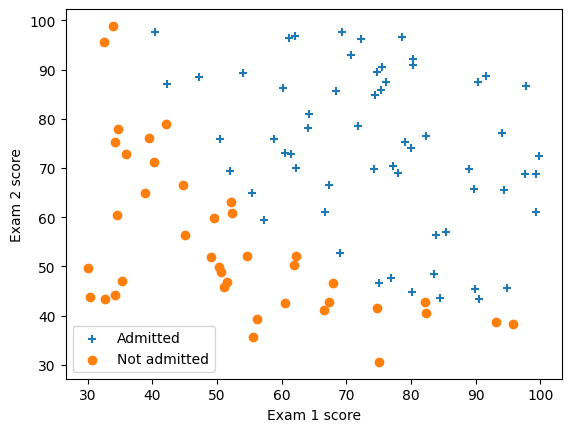

Cost at initial theta (zeros): 0.6931471805599451
Expected cost (approx): 0.693
Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628

Cost at theta found by fminunc: 0.20349770158947464
Expected cost (approx): 0.203
Optimal theta: [-25.16131863   0.20623159   0.20147149]
Expected theta (approx):
 -25.161
 0.206
 0.201



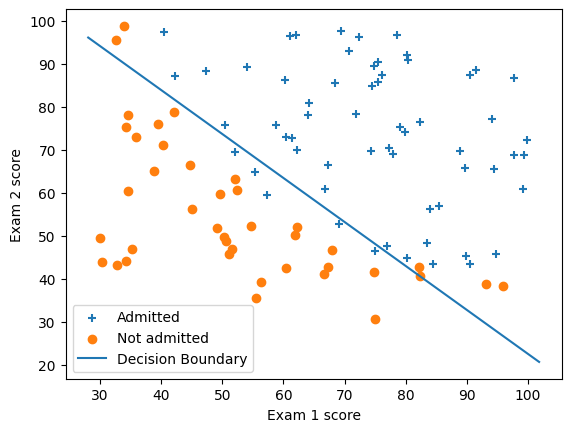

Train Accuracy: 89.0
Expected accuracy (approx): 89.0
For a student with scores 45 and 85, we predict an admission probability of 0.7762906244614266
Expected value: 0.775 +/- 0.002


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Sigmoid fonksiyonunu tanımlama
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Veri yüklemesi
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

# Veriyi görselleştirme fonksiyonu
def plotData(X, y):
    plt.figure()
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Admitted')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.show()

# Veriyi görselleştirme
plotData(X, y)

# Sigmoid fonksiyonunu uygulama
def costFunction(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = (-1 / m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    grad = (1 / m) * X.T.dot(h - y)
    return J, grad

# Veriye bias ekleyerek başlangıç theta değerini ayarlama
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1)
initial_theta = np.zeros(n + 1)

# Hesaplamaları başlatma
cost, grad = costFunction(initial_theta, X, y)
print(f"Cost at initial theta (zeros): {cost}")
print("Expected cost (approx): 0.693")
print(f"Gradient at initial theta (zeros): {grad}")
print("Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n")

# Optimizasyon için fminunc'u kullanma
result = minimize(costFunction, initial_theta, args=(X, y), jac=True, method='TNC')
optimal_theta = result.x
optimal_cost = result.fun

print(f"Cost at theta found by fminunc: {optimal_cost}")
print("Expected cost (approx): 0.203")
print(f"Optimal theta: {optimal_theta}")
print("Expected theta (approx):\n -25.161\n 0.206\n 0.201\n")

# Veriyi görselleştirme ve sınırlayıcı çizimi
def plotDecisionBoundary(theta, X, y):
    plt.figure()
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], marker='+', label='Admitted')
    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], marker='o', label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    
    plot_x = np.array([min(X[:, 1]) - 2, max(X[:, 1]) + 2])
    plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
    plt.plot(plot_x, plot_y, label='Decision Boundary')
    
    plt.legend()
    plt.show()

plotDecisionBoundary(optimal_theta, X, y)

# Tahmin yapma ve doğruluk hesaplama
def predict(theta, X):
    predictions = sigmoid(X.dot(theta))
    return (predictions >= 0.5).astype(int)

p = predict(optimal_theta, X)
accuracy = np.mean(p == y) * 100
print(f"Train Accuracy: {accuracy}")
print("Expected accuracy (approx): 89.0")

# Yeni bir öğrencinin kabul olasılığını tahmin etme
prob = sigmoid(np.dot([1, 45, 85], optimal_theta))
print(f"For a student with scores 45 and 85, we predict an admission probability of {prob}")
print("Expected value: 0.775 +/- 0.002")

# ilk görselimizin altında hesapladıgımız cost degerini görmekteyiz:
Cost at initial theta (zeros): 0.6931471805599451

# bu da olması gereken cost degeri:
Expected cost (approx): 0.693

In [8]:
#2. gorselimizde ise fminunc ile donen theta degerleriyle olusturulan desicion boundary i olusturduk. 
#yani bir karar siniri cizgisi cizdirdik. kodlari plotDecisionBoundary.m icinde bulabilirsiniz

In [7]:
#For a student with scores 45 and 85, we predict an admission probability of 0.7762906244614266
#Expected value: 0.775 +/- 0.002

#Burada ise ilk sinav puani 45 ikinci sinav puani 85 olan bir ogrencinin kabul alma olasiliginin 0.776 oldugunu soyluyor.
#bizim tahminler sonucu buldugumuz sonuc ise 0.775 cikmis ve + - 0.002 lik bir yanilma payi koymus yani tahminimiz basarili.

# Training accuracy

In [9]:
#simdi ise training accuracy mizin yani tahmin dogrulugumuzu artirmak icin gerekli olan kodlari yapalim

In [11]:
import numpy as np

def predict(theta, X):
    # Number of training examples
    m = X.shape[0]
    
    # Initialize the prediction vector
    p = np.zeros((m, 1))
    
    # Compute the hypothesis
    z = np.dot(X, theta)
    h = 1 / (1 + np.exp(-z))
    
    # Make predictions based on the threshold at 0.5
    p = (h >= 0.5).astype(int)
    
    return p

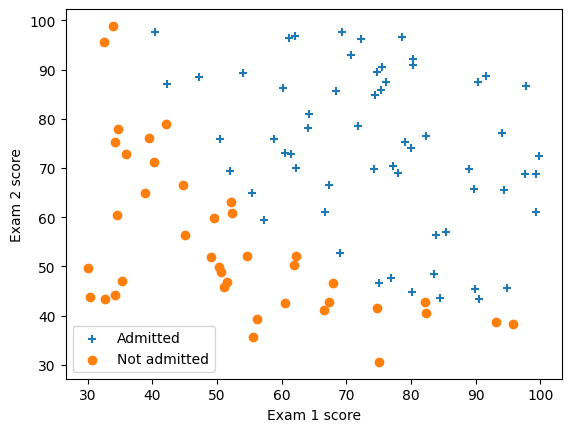

Cost at initial theta (zeros): 0.6931471805599451
Expected cost (approx): 0.693
Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628

Cost at theta found by fminunc: 0.20349770158947464
Expected cost (approx): 0.203
Optimal theta: [-25.16131863   0.20623159   0.20147149]
Expected theta (approx):
 -25.161
 0.206
 0.201



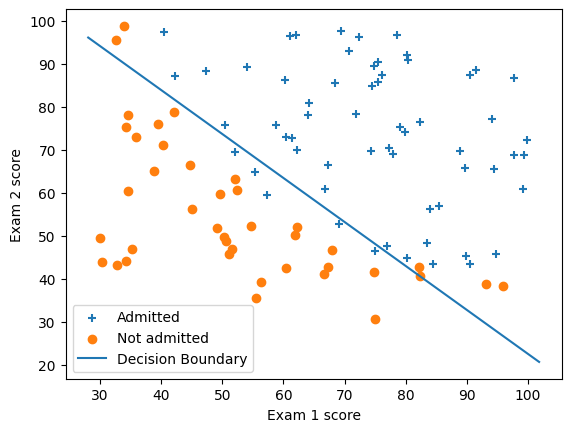

Train Accuracy: 89.0
Expected accuracy (approx): 89.0
For a student with scores 45 and 85, we predict an admission probability of 0.7762906244614266
Expected value: 0.775 +/- 0.002


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Sigmoid fonksiyonunu tanımlama
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Veri yüklemesi
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

# Veriyi görselleştirme fonksiyonu
def plotData(X, y):
    plt.figure()
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Admitted')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.show()

# Veriyi görselleştirme
plotData(X, y)

# Sigmoid fonksiyonunu uygulama
def costFunction(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = (-1 / m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    grad = (1 / m) * X.T.dot(h - y)
    return J, grad

# Veriye bias ekleyerek başlangıç theta değerini ayarlama
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1)
initial_theta = np.zeros(n + 1)

# Hesaplamaları başlatma
cost, grad = costFunction(initial_theta, X, y)
print(f"Cost at initial theta (zeros): {cost}")
print("Expected cost (approx): 0.693")
print(f"Gradient at initial theta (zeros): {grad}")
print("Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n")

# Optimizasyon için fminunc'u kullanma
result = minimize(costFunction, initial_theta, args=(X, y), jac=True, method='TNC')
optimal_theta = result.x
optimal_cost = result.fun

print(f"Cost at theta found by fminunc: {optimal_cost}")
print("Expected cost (approx): 0.203")
print(f"Optimal theta: {optimal_theta}")
print("Expected theta (approx):\n -25.161\n 0.206\n 0.201\n")

# Veriyi görselleştirme ve sınırlayıcı çizimi
def plotDecisionBoundary(theta, X, y):
    plt.figure()
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], marker='+', label='Admitted')
    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], marker='o', label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    
    plot_x = np.array([min(X[:, 1]) - 2, max(X[:, 1]) + 2])
    plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
    plt.plot(plot_x, plot_y, label='Decision Boundary')
    
    plt.legend()
    plt.show()

plotDecisionBoundary(optimal_theta, X, y)

# Tahmin yapma ve doğruluk hesaplama
def predict(theta, X):
    predictions = sigmoid(X.dot(theta))
    return (predictions >= 0.5).astype(int)

p = predict(optimal_theta, X)
accuracy = np.mean(p == y) * 100
print(f"Train Accuracy: {accuracy}")
print("Expected accuracy (approx): 89.0")

# Yeni bir öğrencinin kabul olasılığını tahmin etme
prob = sigmoid(np.dot([1, 45, 85], optimal_theta))
print(f"For a student with scores 45 and 85, we predict an admission probability of {prob}")
print("Expected value: 0.775 +/- 0.002")

In [13]:
#Train Accuracy: 89.0
#Expected accuracy (approx): 89.0
#goruldugu icin tran accuracymiz beklenen hedefe ulasti.

# Simdi ise bir fabrikadaki mikrociplerin kalite testinden gecip gecemedigini tahmin etmek icin regularize logistic regression kullanicaz

In [52]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costFunctionReg(theta, X, y, lambda_val):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    J = (-((np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))) / m +
         (np.sum(lambda_val * (theta ** 2)) / (2 * m)) - 
         (lambda_val * (theta[0] ** 2)) / (2 * m))
    
    grad = np.zeros_like(theta)
    grad[0] = np.dot(X[:, 0].T, (h - y)) / m
    grad[1:] = np.dot(X[:, 1:].T, (h - y)) / m + (lambda_val * theta[1:]) / m
    
    return J, grad

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def plotDecisionBoundary(theta, X, y):
    # Plot Data
    positive = X[y == 1]
    negative = X[y == 0]

    plt.scatter(positive[:, 1], positive[:, 2], marker='+', label='Admitted')
    plt.scatter(negative[:, 1], negative[:, 2], marker='o', label='Not admitted')

    if X.shape[1] <= 3:
        # Calculate the decision boundary line
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
        plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y, label='Decision Boundary')
        plt.legend()
        plt.axis([30, 100, 30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = np.dot(mapFeature(np.array([u[i]]), np.array([v[j]])), theta)

        # Plot z = 0
        plt.contour(u, v, z, levels=[0], linewidths=2)
    
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.show()


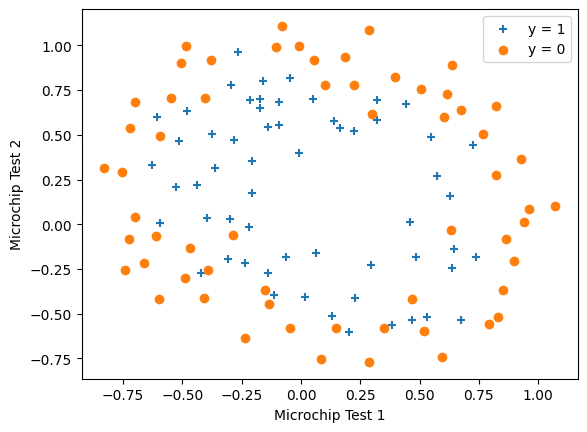

Cost at initial theta (zeros): 0.6931471805599452
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
 [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115

Cost at test theta (with lambda = 10): 3.16450933161501
Expected cost (approx): 3.16
Gradient at test theta - first five values only:
 [0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922

Train Accuracy with lambda = 0: 91.52542372881356

Train Accuracy with lambda = 1: 83.05084745762711

Train Accuracy with lambda = 10: 74.57627118644068

Train Accuracy with lambda = 100: 61.016949152542374


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Sigmoid fonksiyonu
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Maliyet fonksiyonu (Regularization ile)
def costFunctionReg(theta, X, y, lambda_val):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    J = -((np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) / m) + (lambda_val / (2 * m)) * np.sum(theta[1:]**2)
    grad = np.dot(X.T, (h - y)) / m
    grad[1:] += (lambda_val / m) * theta[1:]
    return J, grad

# Tahmin fonksiyonu
def predict(theta, X):
    return np.round(sigmoid(np.dot(X, theta)))

# mapFeature fonksiyonu
def mapFeature(X1, X2):
    degree = 6
    out = np.ones((X1.shape[0], 1))

    for i in range(1, degree + 1):
        for j in range(i + 1):
            new_feature = (X1 ** (i - j)) * (X2 ** j)
            out = np.hstack((out, new_feature.reshape(-1, 1)))

    return out

# Veri yükleme
data = np.loadtxt('ex2data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

# Veriyi görselleştirme
plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='y = 1')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', label='y = 0')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()
plt.show()

# Özelliklerin haritalanması (mapFeature)
X = mapFeature(X[:, 0], X[:, 1])

# Başlangıç parametrelerinin ayarlanması
initial_theta = np.zeros(X.shape[1])

# Regularizasyon parametresi lambda
lambda_val = 1

# Başlangıç theta'sız maliyet ve gradyan hesaplama
cost, grad = costFunctionReg(initial_theta, X, y, lambda_val)

print(f'Cost at initial theta (zeros): {cost}')
print('Expected cost (approx): 0.693')
print(f'Gradient at initial theta (zeros) - first five values only:\n {grad[:5]}')
print('Expected gradients (approx) - first five values only:\n 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115')

# Test theta ve lambda = 10 ile maliyet ve gradyan hesaplama
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print(f'\nCost at test theta (with lambda = 10): {cost}')
print('Expected cost (approx): 3.16')
print(f'Gradient at test theta - first five values only:\n {grad[:5]}')
print('Expected gradients (approx) - first five values only:\n 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922')

# Lambda değerlerini değiştirerek eğitim seti doğruluğunu hesaplama
lambda_values = [0, 1, 10, 100]
for lambda_v in lambda_values:
    # Theta optimizasyonu
    result = minimize(costFunctionReg, initial_theta, args=(X, y, lambda_v), method='BFGS', jac=True)
    optimal_theta = result.x

    # Tahmin yapma ve doğruluk hesaplama
    p = predict(optimal_theta, X)
    accuracy = np.mean(p == y) * 100
    print(f'\nTrain Accuracy with lambda = {lambda_v}: {accuracy}')


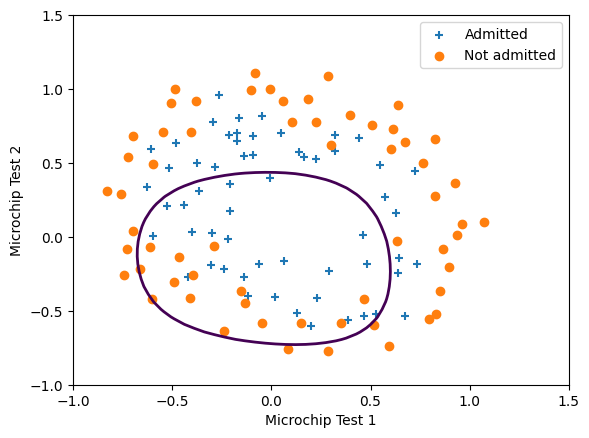

In [54]:
plotDecisionBoundary(optimal_theta, X, y)